In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
data = df[['sepal length (cm)', 'sepal width (cm)']].reset_index()
data_class = iris.target

X = data[['sepal length (cm)']]
y = data['sepal width (cm)']

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [8]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

In [47]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head(5)

,0,1
0,2,2
1,2,2
2,1,1
3,0,0
4,2,2


Text(0.5, 1.0, 'Linear Discriminant')

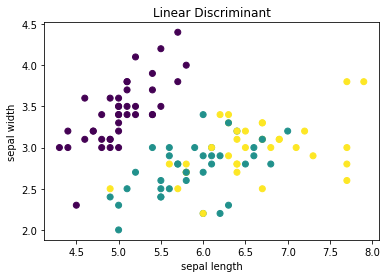

In [44]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Linear Discriminant')

In [13]:
from sklearn.cluster import KMeans

In [36]:
k_inertia = []

ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    k_inertia.append(clf_kmeans.inertia_)

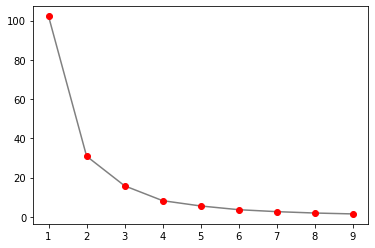

In [37]:
plt.plot(ks, k_inertia, color = '0.5')
plt.plot(ks, k_inertia, 'ro')

In [32]:
#из графика локтя получаем, что оптимальное число кластеров равно 3

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2])

Text(0.5, 1.0, 'Clusters')

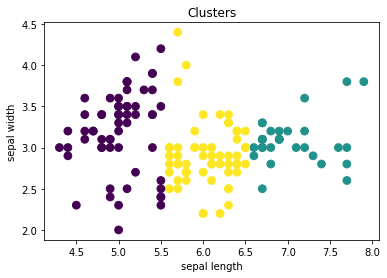

In [43]:
plt.scatter(X, y, c=clusters, s=60)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Clusters')